# American-Sign-Language

Neste projeto, classificaremos os símbolos da língua gestual por meio da **Rede Neural Convolucional (CNN)**. Após o treinamento bem-sucedido do modelo CNN, o alfabeto correspondente de um símbolo de linguagem gestual será previsto. Avaliaremos o desempenho de classificação de nosso modelo usando as **matrizes de confusão** *normalizadas* e *não normalizadas*. Por fim, obteremos a pontuação de **precisão da classificação** do modelo CNN.

### Conjunto de dados

Neste projeto, usamos o conjunto de dados *American Sign Language* (ASL) fornecido pelo MNIST, disponível publicamente no Kaggle. Este conjunto de dados contém 27455 imagens de treinamento e 7172 imagens de teste, todas com formato de 28x28 pixels com valores em tons de cinza entre 0-255. Essas imagens pertencem às 24 classes do alfabeto americano, começando de A a Y (sem rótulos da classe para J (9) e para Z (25) por causa dos movimentos dos gestos).

O conjunto de dados no Kaggle está disponível no formato CSV, onde os dados de treinamento têm 27455 linhas e 785 colunas e os dados de teste têm 7172 linhas e 785 colunas. A primeira coluna do conjunto de dados representa o rótulo da classe da imagem e as 784 colunas restantes representam os 28x28 pixels.

<center><img src="images/american_sign_language.png" style="width:250px;height:150px;"></center>
<caption><center> Fig. 1: Alfabeto em língua gestual americana </center></caption>

##### Implementação de bibliotecas importantes

In [278]:
import numpy as np
import pandas as pd
import random 
import matplotlib.pyplot as plt

In [279]:
from sklearn.preprocessing import LabelBinarizer
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
import cv2
from tensorflow.keras.preprocessing.image import img_to_array
import seaborn as sns
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

##### Leitura dos dados de treino e de teste dos ficheiros CSV

In [280]:
# obter os dados de treinamento
dataTrain = pd.read_csv('sign_mnist_train.csv')
# converter os rotulos dos dados de treinamento para uma matriz (rotulo)
yTrain = dataTrain['label'].values
# remover os rotulos dos dados de treinamento
dataTrain.drop('label', axis = 1, inplace = True)
# converter os dados de treinamento para uma matriz (rotulo + pixeis)
xTrain = dataTrain.values

# obter os dados de teste
dataTest = pd.read_csv('sign_mnist_test.csv')
# converter os rotulos dos dados de teste para uma matriz (rotulo)
yTest = dataTest['label'].values
# remover os rotulos dos dados de teste
dataTest.drop('label', axis = 1, inplace = True)
# converter os dados de teste para uma matriz (rotulo + pixeis)
xTest = dataTest.values
# verificar os dados de teste para verificar os rotulos de classe e as colunas que representam os pixeis
# dataTest.head()

##### Especificar os rótulos de classe para as imagens

In [281]:
class_name = ('A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K' , 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X','Y')

##### Histograma com o número de vezes que aparece uma letra do alfabeto, onde "A" corresponde à classe 0, "B" à classe 1 e assim sucessivamente

([<matplotlib.axis.XTick at 0x297cc1d0100>,
 [Text(0, 0, 'A'),
  Text(1, 0, 'B'),
  Text(2, 0, 'C'),
  Text(3, 0, 'D'),
  Text(4, 0, 'E'),
  Text(5, 0, 'F'),
  Text(6, 0, 'G'),
  Text(7, 0, 'H'),
  Text(8, 0, 'I'),
  Text(9, 0, 'K'),
  Text(10, 0, 'L'),
  Text(11, 0, 'M'),
  Text(12, 0, 'N'),
  Text(13, 0, 'O'),
  Text(14, 0, 'P'),
  Text(15, 0, 'Q'),
  Text(16, 0, 'R'),
  Text(17, 0, 'S'),
  Text(18, 0, 'T'),
  Text(19, 0, 'U'),
  Text(20, 0, 'V'),
  Text(21, 0, 'W'),
  Text(22, 0, 'X'),
  Text(23, 0, 'Y')])

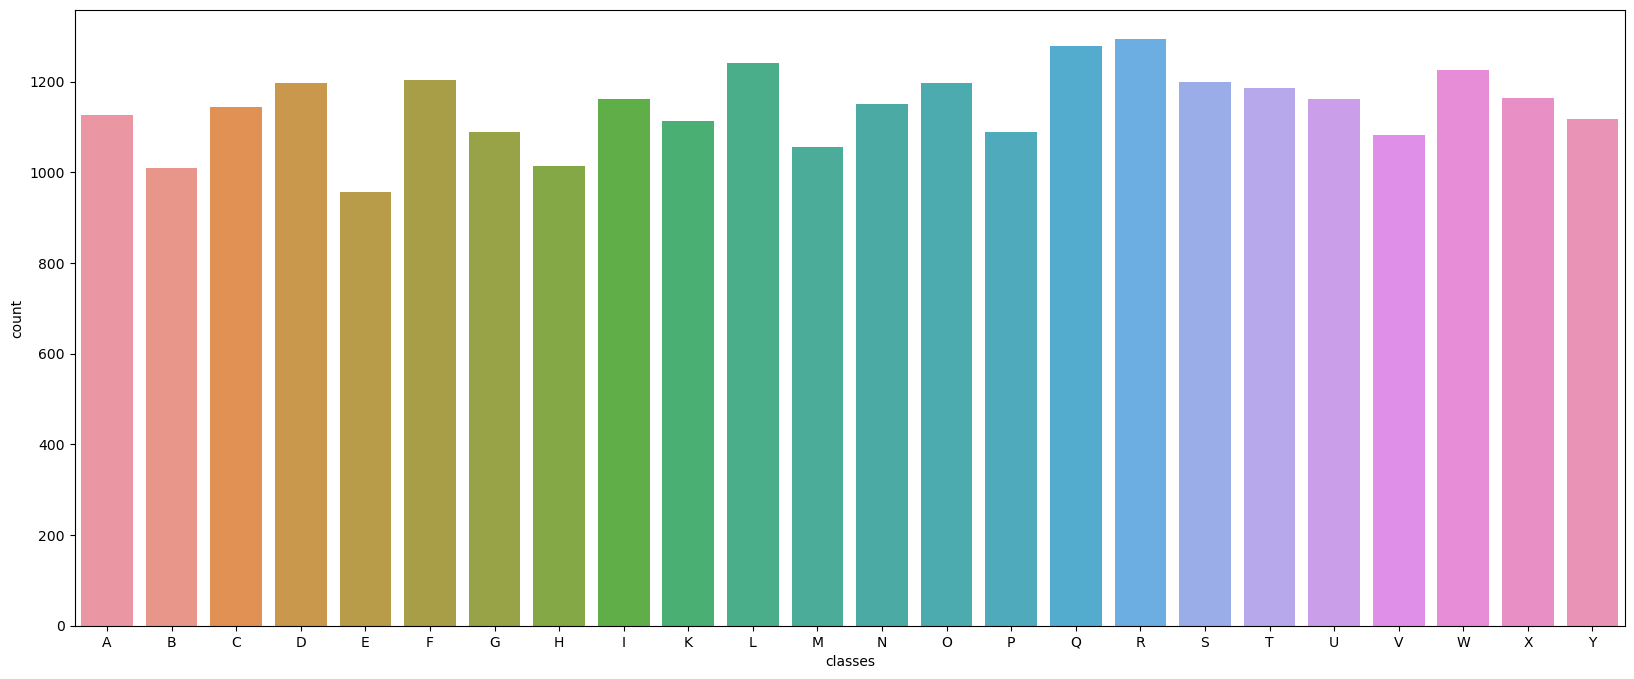

In [282]:
#plt.figure(figsize = (20,8))
#plt.xlabel('classes')
#sns.countplot(x = yTrain)

plt.figure(figsize = (20,8))
plt.xlabel('classes')
sns.countplot(x = yTrain)
x_pos = np.arange(len(class_name))
plt.xticks(x_pos, class_name)

##### ???????????????????????????????????

In [283]:
xTrain = np.array(xTrain.reshape(-1,28,28,1))
xTest = np.array(xTest.reshape(-1,28,28,1))
print(xTrain.shape)
print(xTest.shape)

(27455, 28, 28, 1)
(7172, 28, 28, 1)


> "-1" especifica que esta dimensão no eixo atual deve ser calculada dinamicamente de acordo com a regra de que os elementos totais do tensor permanecem inalterados. Isso nos permite tratar batch_size (parâmetro com valor -1) como um hiperparâmetro que podemos ajustar.

##### Converter os rótulos das classes em rótulos binários (onde "1" significa que pertence e "0" que não pertence à classe)

In [284]:
lbTrain = LabelBinarizer()
lbTest = LabelBinarizer()
yTrain = lbTrain.fit_transform(yTrain)
yTest = lbTest.fit_transform(yTest)

##### Visualizar algumas imagens do conjunto de dados de treinamento

Text(0.5, 0.98, 'Some images from train data set')

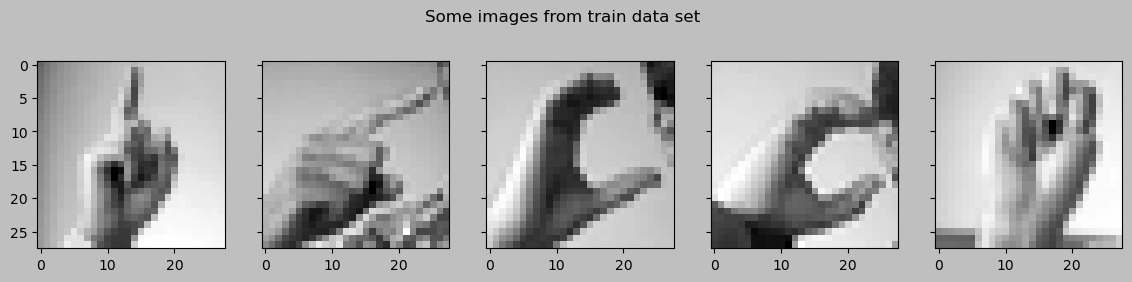

In [285]:
plt.style.use('grayscale')
fig, axs = plt.subplots(1, 5, figsize=(14, 3), sharey=True)
for i in range(5): 
    axs[i].imshow(xTrain[i].reshape(28,28),cmap='gray')
fig.suptitle('Some images from train data set')

### Conjunto de dados Definir o modelo CNN (Convolutional Neural Network)

In [286]:
batch_size = 128
# number of classes
num_classes = 24
epochs = 20

In [287]:
model = Sequential()
model.add(Conv2D(64, kernel_size=(3,3), activation = 'relu', input_shape=(28, 28 ,1) ))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Conv2D(64, kernel_size = (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.20))

model.add(Conv2D(64, kernel_size = (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.20))

model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.20))
model.add(Dense(num_classes, activation = 'softmax'))

Entenda que para o parâmetro 'input_shape', você terá que usar as dimensões de sua imagem de entrada. Faça uma nota de ' Relu ' e ' softmax ', ambas as quais são as funções de ativação.

Observe que o Dropout foi definido como 0,2 no final. No backend, ele essencialmente reduz o overfitting, ou seja, o fenômeno quando o modelo tem um desempenho muito bom nos dados de treinamento, mas falha miseravelmente com os dados de teste.


> A partir da definição da documentação tensorflow.keras, o modelo **Sequencial** é uma stack linear de camadas.

> **kernel_size** é um *inteiro* que especifica o mesmo valor para todas as dimensões espaciais, ou *tuplo/lista* de 2 inteiros, que especifica a altura e largura da janela de convolução 2D.

> **activation** é uma função de ativação para ser aplicada.

> **input_shape** é um tensor com a forma: batch_shape + (linhas, colunas, canais), quando data_format = 'canais_last'.

##### Compilar o modelo de CNN (Convolutional Neural Network)

Depois do CNN pronto, temos de treinar o modelo alimentando o conjunto de treinamento que fizemos anteriormente. Existem vários otimizadores que podem ser usados, mas 'adam' é o preferido aqui. O número de epochs (épocas) e o tamanho do lote (batch_size) podem ser ajustados. Um número maior de épocas leva a mais tempo de treinamento, mas pode produzir melhor precisão.

Depois que a arquitetura da CNN foi definida, tentamos otimizar o desempenho do modelo selecionando um valor apropriado para o número de épocas. Anteriormente, mencionamos que cada nó obtém uma soma ponderada de suas entradas. Os pesos aplicados a cada entrada são aprendidos durante o processo de treinamento e atualizados a cada época. Uma época é uma única passagem por todos os dados de treinamento. Na primeira época, a rede neural estima um valor para cada peso. Para cada época subsequente, a rede neural atualiza esses pesos com valores que reduzem a perda geral. Geralmente, mais épocas resultam em classificadores mais precisos; no entanto, mais épocas também produzem modelos mais complexos. Usando um conjunto de validação, determinamos que 10 épocas nos forneceram o melhor equilíbrio entre precisão e complexidade.

In [288]:
model.compile(loss = tensorflow.keras.losses.categorical_crossentropy, optimizer=tensorflow.keras.optimizers.Adam(), metrics=['accuracy'])

##### Treinar o modelo CNN (Convolutional Neural Network)

In [289]:
history = model.fit(xTrain, yTrain, validation_data = (xTest, yTest), epochs=epochs, batch_size=batch_size)

Epoch 1/20
215/215 [==============================] - 35s 162ms/step - loss: 4.3575 - accuracy: 0.1002 - val_loss: 1.7260 - val_accuracy: 0.5084
Epoch 2/20
215/215 [==============================] - 32s 151ms/step - loss: 1.8507 - accuracy: 0.3955 - val_loss: 1.0327 - val_accuracy: 0.7096
Epoch 3/20
215/215 [==============================] - 36s 169ms/step - loss: 1.2508 - accuracy: 0.5807 - val_loss: 0.6642 - val_accuracy: 0.7856
Epoch 4/20
215/215 [==============================] - 33s 154ms/step - loss: 0.8494 - accuracy: 0.7091 - val_loss: 0.4593 - val_accuracy: 0.8537
Epoch 5/20
215/215 [==============================] - 33s 151ms/step - loss: 0.5830 - accuracy: 0.8008 - val_loss: 0.3651 - val_accuracy: 0.8696
Epoch 6/20
215/215 [==============================] - 32s 151ms/step - loss: 0.4565 - accuracy: 0.8440 - val_loss: 0.2973 - val_accuracy: 0.9074
Epoch 7/20
215/215 [==============================] - 33s 153ms/step - loss: 0.3492 - accuracy: 0.8834 - val_loss: 0.2183 - val_ac

In [62]:
model = tensorflow.keras.models.load_model('sign_language')

##### Visualizar o desempenho do treinamento do modelo CNN
Espere o modelo treinar. Uma vez feito isso, podemos plotar a variação de precisão com a época para visualizar como nosso modelo está melhorando a cada época.

Text(0.5, 1.0, 'Evolução de precisão (Accurary Evolution)')

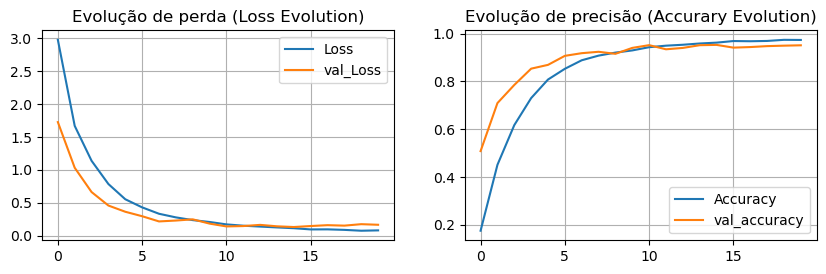

In [290]:
plt.style.use('default')
plt.figure(figsize = (10,6))

plt.subplot(2,2,1)
plt.plot(history.history['loss'], label = 'Loss')
plt.plot(history.history['val_loss'], label = 'val_Loss')
plt.legend()
plt.grid()
plt.title('Evolução de perda (Loss Evolution)')

plt.subplot(2,2,2)
plt.plot(history.history['accuracy'], label = 'Accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.legend()
plt.grid()
plt.title('Evolução de precisão (Accurary Evolution)')

##### Usar o modelo CNN treinado para fazer previsões sobre os dados de teste invisíveis

In [298]:
#predicted_classes = model.predict_classes (xTest)
#print(predicted_classes)
#print(np.unique(predicted_classes))

predicted_classes = model.predict_classes(xTest, batch_size=128, verbose=0)
predicted_classes[1]
pred2 = np.zeros(shape=(7172,))
for i in range(7172):
    if(predicted_classes[i]>=9):
        pred2[i] = predicted_classes[i] + 1
    else:
        pred2[i] = predicted_classes[i]
pred2 = pred2.astype(int)

##### Visualização das previsoes dos rótulos das classes para as imagens de teste do modelo da CNN

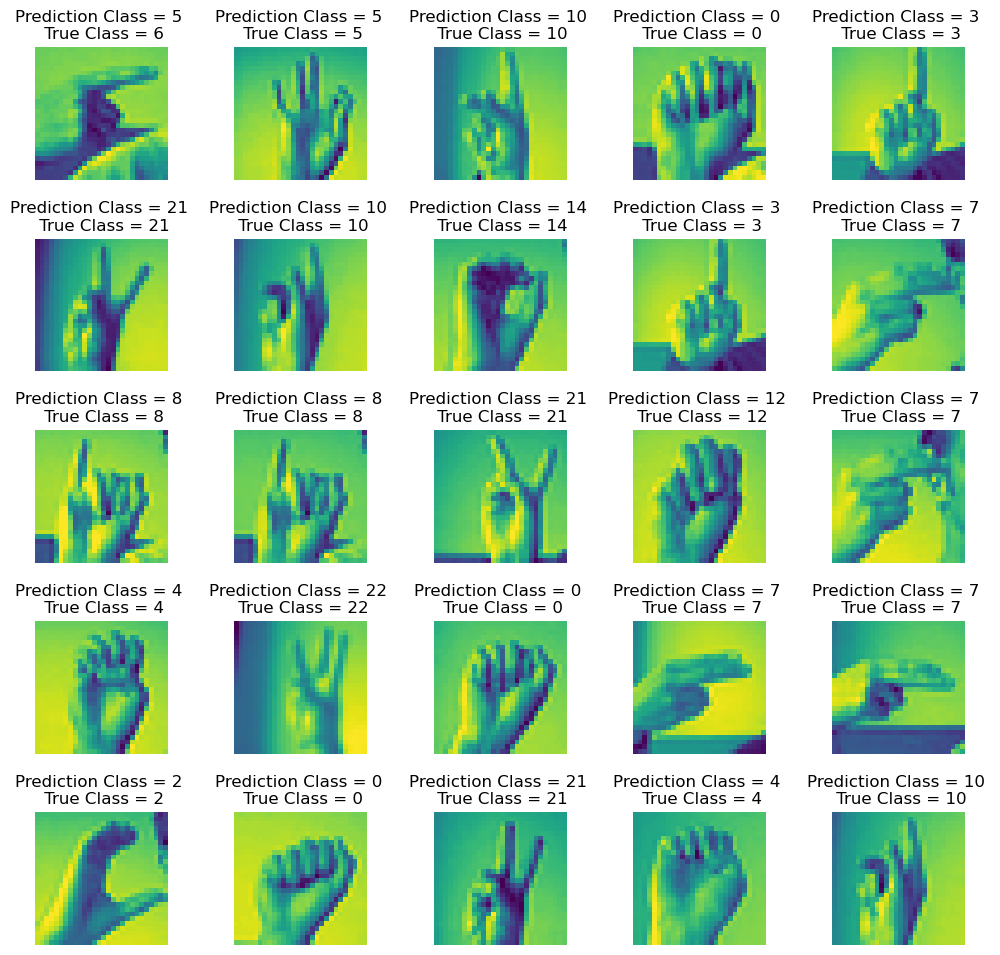

In [293]:
L = 5
W = 5

fig, axes = plt.subplots(L, W, figsize = (12,12)) 
axes = axes.ravel() 
for i in np.arange (0, L * W):
    if (predicted_classes[i] >= 9):
        axes[i].imshow(xTest[i].reshape(28,28)) 
        axes[i].set_title("Prediction Class = {0} \n True Class = {1}".format(pred2[i], yTest2[i])) 
        axes[i].axis('off') 
    else:
        axes[i].imshow(xTest[i].reshape(28,28)) 
        axes[i].set_title("Prediction Class = {0} \n True Class = {1}".format(pred2[i], yTest2[i])) 
        axes[i].axis('off') 
plt.subplots_adjust(wspace = 0.5)

##### Visualização do relatório completo de classificação, usando matrizes de confusão normalizadas e não normalizadas

In [299]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics

rounded_labels=np.argmax(yTest, axis=1)
rounded_labels[1]
cm = metrics.confusion_matrix(rounded_labels, predicted_classes)

##### Definir a função para o gráfico da matriz de confusão

In [300]:
def plot_confusion_matrix(y_true, y_pred, classes, normalize=False, title=None, cmap=plt.cm.Blues):
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # matriz de confusao
    cm = confusion_matrix(y_true, y_pred)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    # visualizacao
    fig, ax = plt.subplots(figsize=(10, 10))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]), yticks=np.arange(cm.shape[0]), xticklabels=classes, yticklabels=classes, title=title, ylabel='True label', xlabel='Predicted label')

    # girar os rótulos e definir o alinhamento
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
    
    # loop sobre dimensoes de dados e criar anotacoes de texto
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

np.set_printoptions(precision=2)

##### Matriz de confusão não normalizada

In [301]:
plt.figure(figsize=(20,20))
plot_confusion_matrix(yTest, predicted_classes, classes = class_name, title='Non-Normalized Confusion matrix')
plt.show()

ValueError: Classification metrics can't handle a mix of multilabel-indicator and multiclass targets

<Figure size 2000x2000 with 0 Axes>

##### Matriz de confusão normalizada

Normalized confusion matrix


<ipython-input-300-92740214017a>:11: RuntimeWarning: invalid value encountered in true_divide
  cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


ValueError: The number of FixedLocator locations (25), usually from a call to set_ticks, does not match the number of ticklabels (24).

<Figure size 3500x3500 with 0 Axes>

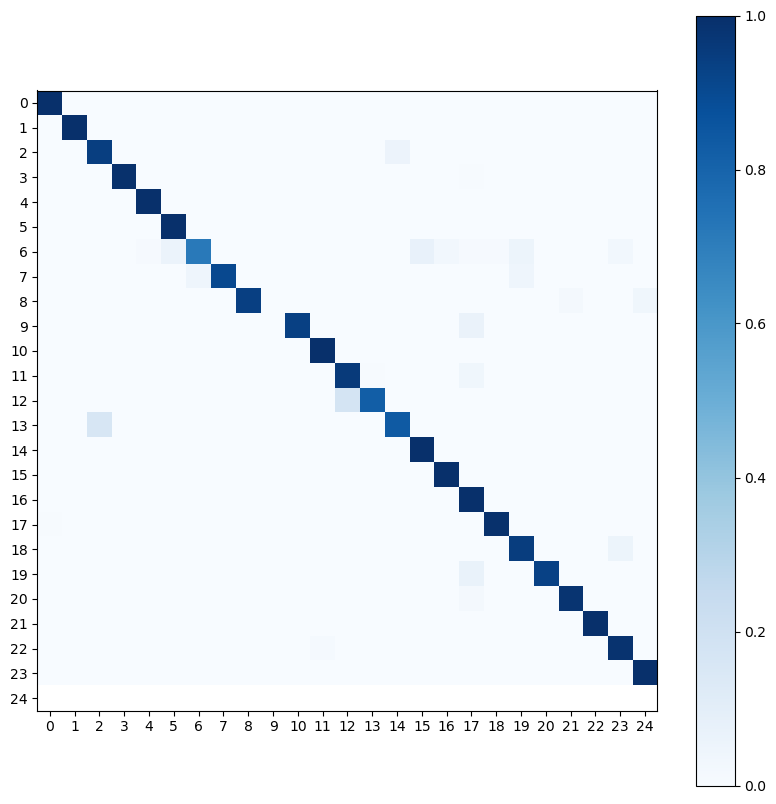

In [302]:
plt.figure(figsize=(35,35))
plot_confusion_matrix(rounded_labels, predicted_classes, classes = class_name, normalize=True, title='Non-Normalized Confusion matrix')
plt.show()

##### Pontuação média de precisão da classificação

In [140]:
from sklearn.metrics import accuracy_score
acc_score = accuracy_score(yTest, predicted_classes)
print('Accuracy Score = ',acc_score)

Accuracy Score =  0.40532626882320133


O modelo treinado obteve uma precisão de cerca de 92,23%. Isso é muito bom. Também é possível obter uma precisão muito maior ajustando os parâmetros que usamos.

Nosso modelo pode reconhecer corretamente a qual alfabeto um gesto de mão se refere na linguagem de sinais quase 92 vezes para cada 100 imagens! Dada uma imagem 28 * 28 de um gesto de mão como entrada, é altamente provável que nosso modelo identifique o que é corretamente.

Para entender melhor os pontos fortes e fracos desse modelo, criamos uma matriz de confusão.

A partir da matriz de confusão, vemos que os dois sinais mais comumente confundidos são as letras “M” e “S”. Imagens de cada um desses sinais são mostradas abaixo.

In [ ]:
def classify(image):
    image = cv2.resize(image, (28, 28))
    image = image.astype("float") / 255.0
    image = img_to_array(image)
    image = np.expand_dims(image, axis = 0)
    proba = model.predict(image)
    idx = np.argmax(proba)
    return class_names[idx]

In [ ]:
classify(xTrain[0]*255)

In [ ]:
print(yTrain[0])

In [ ]:
#RITA, isto é um experimento para provar que se mudarmos alguns pixeis da imagem, a Letra é a mesma,
#mas se mudarmos pixeis a mais a imagem diz que é outra letra.
arr = []
arr = xTrain[0].copy()
arr[0] = 90
arr[1] = 90
#arr[5] = 90

In [ ]:
classify(arr*255) # igual a xTrain[0] mas com alterações dos valores do array xTrain[0]